In [8]:
from matplotlib import pyplot as plt
import pandas as pd
from distributed import Client, LocalCluster

from leap_ec.representation import Representation
from leap_ec.ops import tournament_selection, clone, evaluate, pool
from leap_ec.real_rep.initializers import create_real_vector
from leap_ec.real_rep.ops import mutate_gaussian
from leap_ec.probe import print_individual

from leap_ec.multiobjective.problems import SCHProblem
from leap_ec.multiobjective.asynchronous import steady_state_nsga_2

In [9]:
POP_SIZE=50
MAX_BIRTHS=5000

In [10]:
sch_problem = SCHProblem() # Schaffer's Study problem

In [11]:
# We're only going to do a narrow range, which is sufficient for demonstration purposes. The original
# NSGA-II paper explored a wider range.
sch_representation = Representation(initialize=create_real_vector(bounds=[(-10, 10)]))

In [12]:
pipeline = [tournament_selection, # uses domination comparison in MultiObjective.worse_than()
            clone,
            mutate_gaussian(std=0.5, expected_num_mutations=1),
            evaluate,
#             print_individual, # only if you want to see every single new offspring
            pool(size=POP_SIZE),
            ]

In [13]:
cluster = LocalCluster(n_workers=15)
client = Client(cluster)

/home/lmccombs/anaconda3/envs/leap/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41115 instead
  warnings.warn(


In [14]:
final_pop = steady_state_nsga_2(client, MAX_BIRTHS,
                   pop_size=POP_SIZE, init_pop_size=POP_SIZE,
                   problem=sch_problem,
                   representation=sch_representation,
                   offspring_pipeline=pipeline)

In [15]:
df = pd.DataFrame([(x.genome[0], x.fitness[0], x.fitness[1], x.rank, x.distance) for x in final_pop])
df.columns = ['gene','f1','f2','rank','distance']
df

,gene,f1,f2,rank,distance
0,1.533705,2.352252,2.174307e-01,1,0.087803
1,1.932607,3.734969,4.541841e-03,1,0.069700
2,0.646001,0.417318,1.833312e+00,1,0.071075
3,0.221017,0.048849,3.164779e+00,1,0.093463
4,0.831167,0.690839,1.366170e+00,1,0.087224
5,0.130709,0.017085,3.494249e+00,1,0.103108
6,2.000752,4.003010,5.661808e-07,1,inf
7,1.037470,1.076344,9.264641e-01,1,0.079569
8,0.683901,0.467720,1.732118e+00,1,0.071013
9,0.073159,0.005352,3.712716e+00,1,0.097788


<Axes: xlabel='f1', ylabel='f2'>

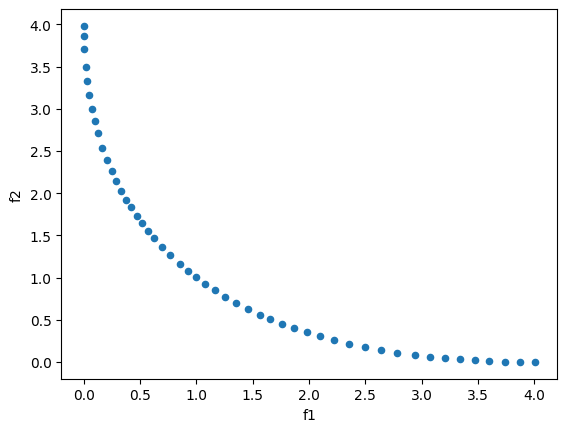

In [16]:
df.plot(x='f1',y='f2', kind='scatter')